<a href="https://colab.research.google.com/github/martha-irungu/WK_7_Core_IP/blob/master/Week_7_Core_IP__Martha_Irungu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###  **1. Defining the question**

**a) Specifying the question**

i)Study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months.

ii) Create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 


**b)Defining the Metrics for success**

To meet the objective of the study we will create the following regression models and assess suitability of each of the tested models on their appropriateness to solve the given problem. We will subject the evaluation to the assumptions of each model and compare performance based metrics such as RMSE, MSE, accuracy scores

i)Multiple Linear Regression

ii)Quantile Regression

iii)Ridge Regression

iv)Lasso Regression

v)Elastic Net Regression


**c) Understanding the context**

Assessing house price developments has become an integral component of macro-financial surveillance both locally and globally. 
The housing sector is not only an important component of the transmission channels between the credit and the business cycle and may act as a propagation mechanism for shocks but it can also play a key role in the origin of financial crises. Housing markets can be subject to bubbles, with house prices developments becoming disconnected from the fundamental drivers of housing demand and supply. 

House prices are influenced by a number of factors. As a Data Scientist, working for Hass Consulting Company which is a real estate leader with over 25 years of experience. I tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 

**d) Recording the experimental design**

The following steps were implemented

1.) Business Understanding, this keeps you grounded to the main question and gives light throughout all your analysis.

2.) Reading the data.

3.) Data Exploration and cleaning to prepare the data for modelling

4.) EDA, here is where I did my analysis and visualization of the data.

5.) Checking for multicollinearity.

6.) Model Development.

**e)Data Relevance**

The data provided for this study consists of columns with factors likely to influence prices of houses. The factors such as size of the house, number of bedrooms, grade among others can influence price of the house. There is no detailed desription on all the columns, this is a limitation as it may result to wrong assumptions, but is worth noting that the data is relevant for the study.

## **2. Importing the libraries**

In [151]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import metrics 
import matplotlib
from matplotlib import pyplot
from sklearn import linear_model


##**3. Reading and checking the data**

In [140]:
#Previewing the first 5 columns of the dataset
df=pd.read_csv('house_data.csv')
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
#Checking the shape of the dataset
df.shape 

(21613, 20)

Our dataset has 21,613 records and 20 columns

In [22]:
#Checking the datatypes of our dataset
df.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Our dataset has integers and float data types. We note that some columns like postal code, bathrooms,year built, year renovated are not in the right format. We will change them to right format to ease the analysis

In [23]:
#Checking the summary information of the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

our dataset has 21,613 records, has no null values, 5 clolumns in float and 15 in integer data types

In [ ]:
#Checking statistical summary of the dataset
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


We observe that the mean of house price is 540,182, the minimum price being 7.5e+4 (75,000) and maximum 7.7e+6 (770,0000)

In [24]:
#Checking the null values in our dataset
df.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

We observe that our records have no null values

In [128]:
#changing data types to right format
#Changing date from object to date time
df.yr_built=pd.to_datetime(df.yr_built)
df.yr_renovated=pd.to_datetime(df.yr_renovated)

#Changing zipcode from integer to object data type

df['zipcode'] = df['zipcode'].apply(np.str)
df.dtypes

id                        int64
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built         datetime64[ns]
yr_renovated     datetime64[ns]
zipcode                  object
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [129]:
#Remove column ID and zip code as we will not need them

df.drop(["id","zipcode"], axis=1, inplace = True) 
df.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1970-01-01 00:00:00.000001955,1970-01-01 00:00:00.000000000,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1970-01-01 00:00:00.000001951,1970-01-01 00:00:00.000001991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1970-01-01 00:00:00.000001933,1970-01-01 00:00:00.000000000,47.7379,-122.233,2720,8062


Id and zipcode columns successfully dropped

In [67]:
#Checking for duplicates
df.duplicated().sum() 


5

In [133]:
#Dropping the duplicates
df.drop_duplicates(keep=False, inplace=True)
df.duplicated().sum()

0

In [66]:
#Checking the unique values in each column

columns = df.columns.to_list()

for column in columns:
  print('\n')
  print('Column Name:', column)
  print(df[column].unique())



Column Name: price
[221900. 538000. 180000. ... 541800. 610685. 402101.]


Column Name: bedrooms
[ 3  2  4  5  1  6  7  0  8  9 11 10 33]


Column Name: bathrooms
[1.   2.25 3.   2.   4.5  1.5  2.5  1.75 2.75 3.25 4.   3.5  0.75 4.75
 5.   4.25 3.75 0.   1.25 5.25 6.   0.5  5.5  6.75 5.75 8.   7.5  7.75
 6.25 6.5 ]


Column Name: sqft_living
[1180 2570  770 ... 3087 3118 1425]


Column Name: sqft_lot
[ 5650  7242 10000 ...  5813  2388  1076]


Column Name: floors
[1.  2.  1.5 3.  2.5 3.5]


Column Name: waterfront
[0 1]


Column Name: view
[0 3 4 2 1]


Column Name: condition
[3 5 4 1 2]


Column Name: grade
[ 7  6  8 11  9  5 10 12  4  3 13  1]


Column Name: sqft_above
[1180 2170  770 1050 1680 3890 1715 1060 1890 1860  860 1430 1370 1810
 1980 1600 1200 1250 2330 2270 1070 2450 1710 1750 1400  790 2570 2320
 1190 1510 1090 1280  930 2360  890 2620 2600 3595 1570  920 3160  990
 2290 2165 1640 1000 2130 2830 2250 2420 3250 1850 1590 1260 2519 1540
 1110 1770 2720 2240 3070 2380 239

We observe that the data has the following columns that we need to investigate:

condition column with values: [3 5 4 1 2]-This may mean 1 the house is in great condition and 5 is poor condition.

Column Name: grade
[ 7  6  8 11  9  5 10 12  4  3 13  1]-1 may imply grade 1 is great and grade 12 is poor

Column Name: waterfront
[0 1]- 0 may be houses without a water front and 1 house with a water front
Column Name: bedrooms
[ 3  2  4  5  1  6  7  0  8  9 11 10 33]-The dataset has houses with 1-11 bedrooms.We note house with 33 bedrooms which could be an outlier

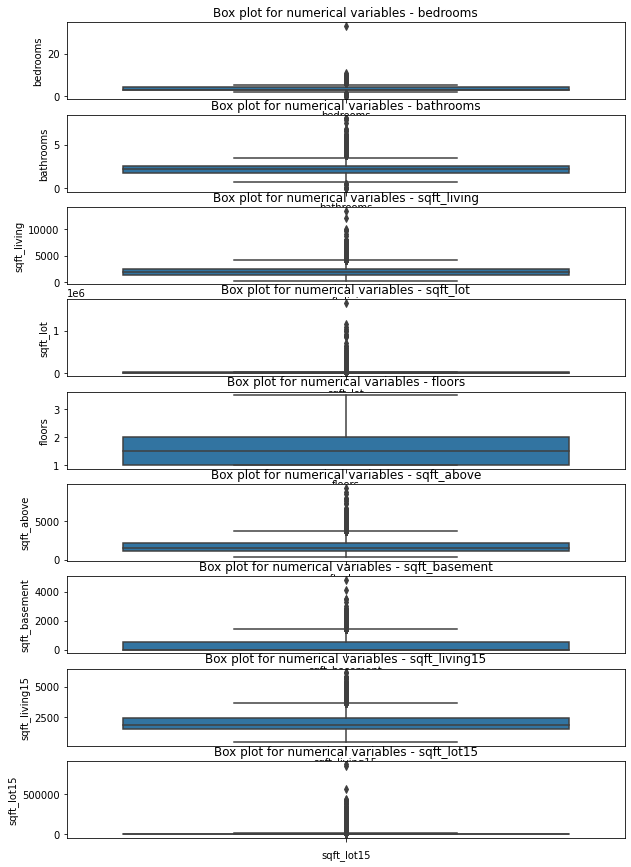

In [42]:
# checking for outliers

column_names = ['bedrooms','bathrooms', 'sqft_living','sqft_lot','floors','sqft_above','sqft_basement','sqft_living15','sqft_lot15']

fig, ax = plt.subplots(len(column_names), figsize=(10,15))

for i, col_val in enumerate(column_names):

    sns.boxplot(y=df[col_val], ax=ax[i])
    ax[i].set_title('Box plot for numerical variables - {}'.format(col_val), fontsize=12)
    
    ax[i].set_xlabel(col_val, fontsize=10)

plt.show()


It is evident that most of our columns have outliers. We choose not to remove them as they can add value to our prediction of prices of the house. Eg. if a house has many bedrooms,bathrooms, square feet its likely to cost more than a house with few of those factors

**4.)EDA**

i)Univariate and bivariate analysis 

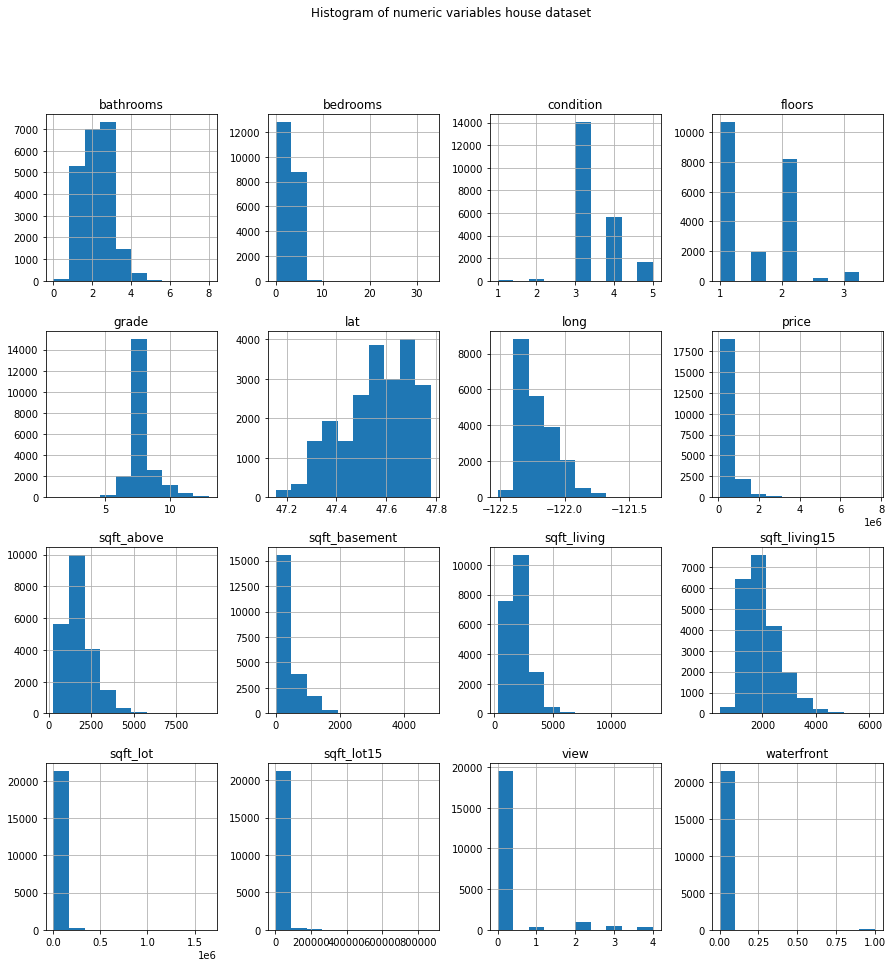

In [134]:

#Visualizing distribution of the data using histogram

df.hist(bins=10, figsize=(15,15))
plt.suptitle("Histogram of numeric variables house dataset")
plt.savefig('predicting price of house Histogram')
plt.show()

We observe that some of our columns are positively skewed and other are negatively skewed, but they generally follow a normal distribution

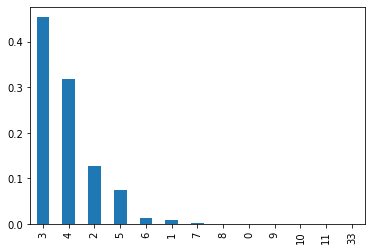

In [44]:
# Plotting number of bedrooms by percentage
(df['bedrooms'].value_counts()/len(df)).plot.bar()

We observe that we have more than 40% with 3 bedrooms and slighly above 30% with 4 bedrooms

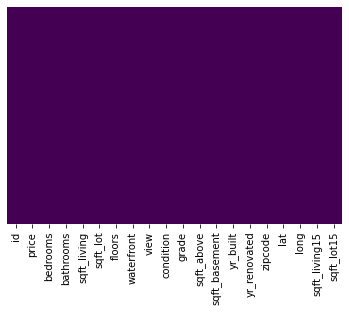

In [ ]:
#Visualizing null values 
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

There are no null values

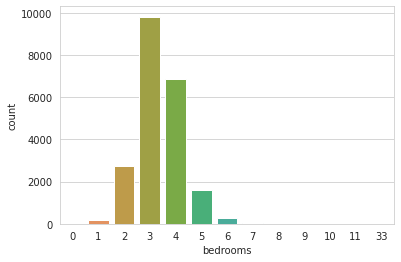

In [ ]:
#Plotting count plots 
sns.set_style('whitegrid')
sns.countplot (x='bedrooms', data=df)

We observe that we have close to 10,000 with 3 bedrooms and over 6,000 with 4 bedrooms

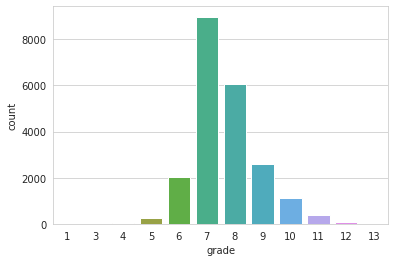

In [ ]:
#Plotting count plots
sns.set_style('whitegrid')
sns.countplot (x='grade', data=df)

We observe that we have over 8,000 houses in grade 7 and  6,000 in grade 8

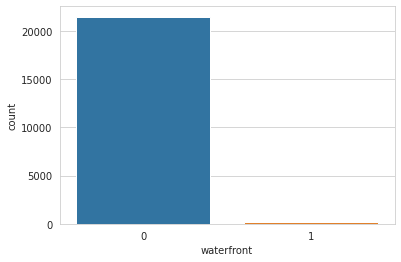

In [ ]:
#Plotting count plot
sns.set_style('whitegrid')
sns.countplot (x='waterfront', data=df) 

Most of the houses have 0 this assumes that they have no water front as we did not have sufficient description of the dataset that we had,we have very few houses with water front

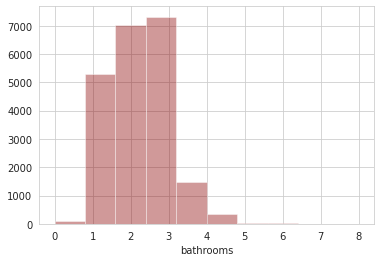

In [ ]:
#Visualizing using distribution plots
sns.distplot(df['bathrooms'], kde=False, color='darkred', bins=10)

We observe that most of the bathrooms are 2 and 3

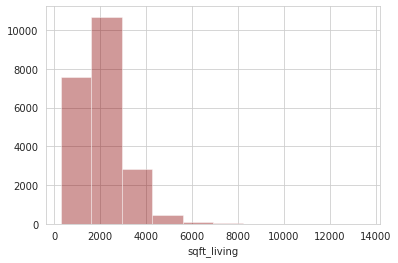

In [ ]:
#Visualizing using distribution plots 

sns.distplot(df['sqft_living'], kde=False, color='darkred', bins=10)

Most houses have living rooms below 3,000sqft

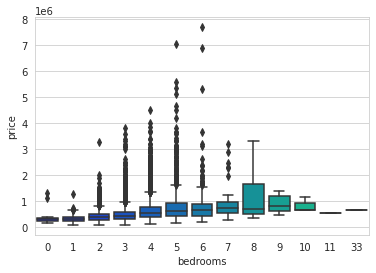

In [ ]:
#Visualizing using box plots  
sns.boxplot(x='bedrooms',y ='price',data=df,palette ='winter') 

We observe that the range prices for 1-7 bedrooms have outliers, this could be influenced by other factors such as condition,grade, waterfront among others.While prices for 8 bedrroms and above do not have outliers

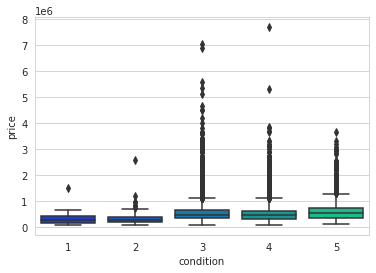

In [ ]:
#Visualizing using box plots 
sns.boxplot(x='condition',y ='price',data=df,palette ='winter')

We observe that prices for all the conditions have outliers with those in 3 and 4 being severe

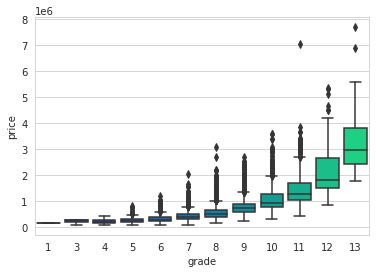

In [ ]:
#Visualizing using box plots
sns.boxplot(x='grade',y ='price',data=df,palette ='winter')

We observe that prices increase with grade.Houses with higher grade ie grade 13 could be superior than those with lower grade. Outliers are also evident

ii)Multivariate Analysis

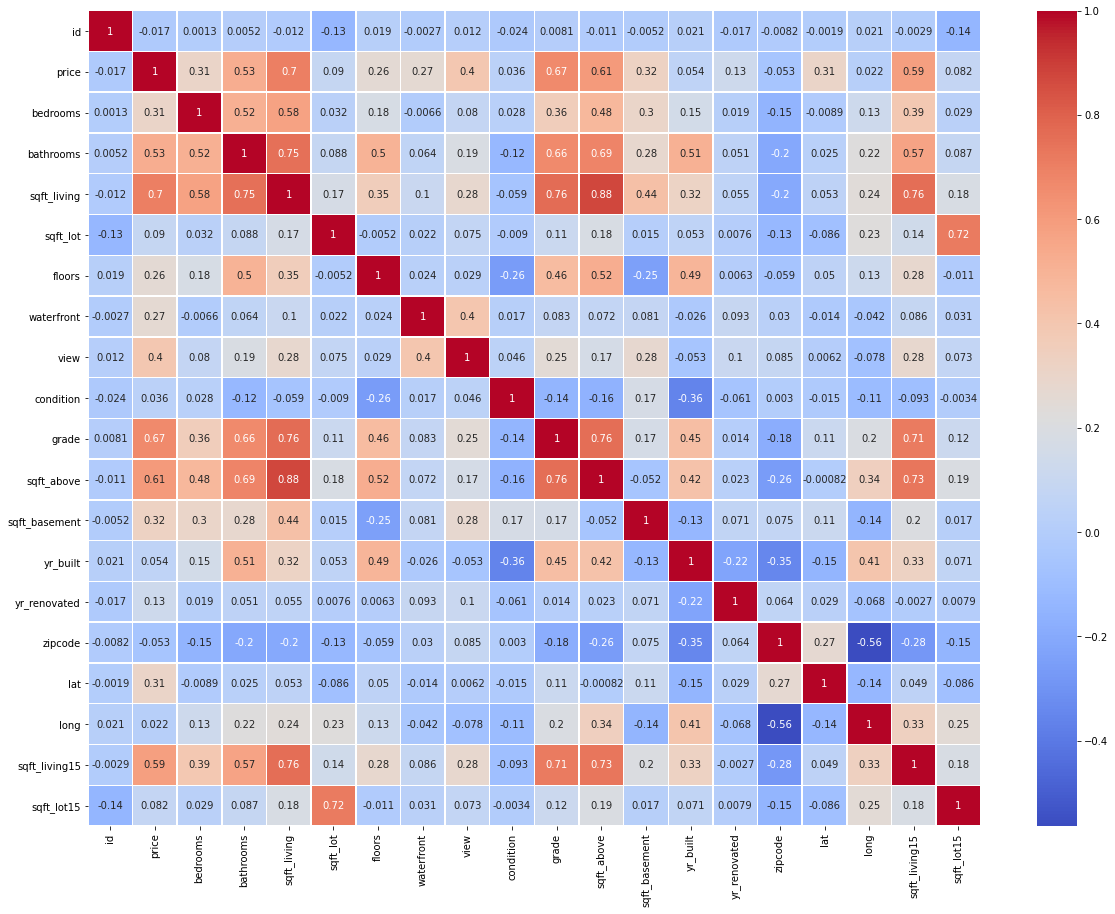

In [ ]:
# Correlation matrix to check relationship of different variables

df_corr = df.corr()
plt.figure(figsize=(20,15))

# We then plot our heatmap visualistion
import seaborn as sns
sns.heatmap(df_corr, annot=True, linewidth=0.5, cmap='coolwarm');


We observe that sqft_lot15, sqft above,square feet living,bathrooms and grade have above 0.5 correlation with the price of the house. No of bedrooms has 0.3 positive correlation to the price, this may imply that the size could be basic, then customers look at how big the house is which is determined by square feet and grade of the house is also a key factor.

Factors like year build, post code,longitude, condition are not influecing the price as much

In [ ]:
#Plotting scatter plots 

iii) Checking for multicolllinearity

This is to help us asssess if there is multicollinearity expressed among our independent variables.

In [141]:

X= df.drop(['price'], axis=1)
y= df['price']

In [142]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

vif = pd.DataFrame() 

vif["vif_factor"] =  [variance_inflation_factor(df.values, j) for j in range(df.shape[1])]

vif["feature"] = df.columns

In [51]:
#Printing VIF(variance_inflation_factor)
print(vif)

    vif_factor        feature
0     3.632659             id
1     3.330835          price
2     1.673248       bedrooms
3     3.375022      bathrooms
4          inf    sqft_living
5     2.104736       sqft_lot
6     1.951202         floors
7     1.266535     waterfront
8     1.460071           view
9     1.228050      condition
10    3.706482          grade
11         inf     sqft_above
12         inf  sqft_basement
13    2.268879       yr_built
14    1.146372   yr_renovated
15    0.505574        zipcode
16    1.351917            lat
17    1.832974           long
18    2.889117  sqft_living15
19    2.145441     sqft_lot15


We observe that our most of our score are below 4 which means that high colinearity does not exist in our independent variables. We have sqft living, sqft above and sqrft basement with infinite values

###  **5. Implementing different models**

1)Multiple linear Regression Model

In [68]:
#Defining our variables  into X and y
X= df.drop(['price'], axis=1)
y= df['price']

In [70]:
# Linear Regression model
linear = LinearRegression()

#splitting our dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# train model
linear.fit(X_train, y_train)

# using the trained model to make predictions on x_test
y_pred_linear = linear.predict(X_test)


In [71]:
#Printing the metrics to assess performance of the model
linear_MAE = metrics.mean_absolute_error(y_test, y_pred_linear)
linear_MSE= metrics.mean_squared_error(y_test, y_pred_linear)
linear_RMSE = np.sqrt(metrics.mean_absolute_error(y_test, y_pred_linear))
linear_R2 = metrics.r2_score(y_test, y_pred_linear)

print('Linear Regression')
print('Mean Absolute Error', linear_MAE)
print('Mean Squared Error', linear_MSE)
print('Root Mean Squared Error',linear_RMSE)
print('R2 Score',linear_R2)

Linear Regression
Mean Absolute Error 123682.09789946444
Mean Squared Error 43476677824.023735
Root Mean Squared Error 351.6846569008441
R2 Score 0.7027629185607839


Our model has performed well with R2 score of 70.2% and with RMSE of 351.68

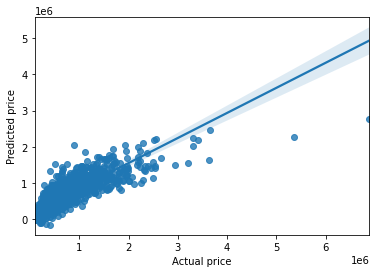

In [14]:
#Visualizing the actual price and the predicted price
axis = sns.regplot(x = y_test, y = y_pred_linear)
axis.set(xlabel = 'Actual price',
      ylabel = 'Predicted price')
plt.show()

We observe that our model performed well as most of our prediction scatter around the line of best fit.

In [149]:
#To compare the actual output values for X_test with the predicted values

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
957,323000.0,539234.534275
14143,690000.0,539477.462075
19452,142000.0,539273.273722
20510,560000.0,539475.921493
18354,545000.0,539081.498503
...,...,...
5349,386591.0,539247.779819
11082,344950.0,539308.051200
4413,1150000.0,539266.119655
17461,622200.0,539473.056762


i)Visualizing residual plot

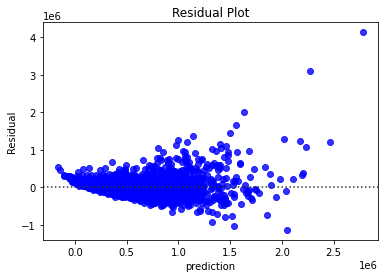

In [19]:
#Visualizing residual plot for our model
sns.residplot(y='residuals', x='prediction', data=linear_residuals_df, color='blue')
plt.title("Residual Plot")
plt.xlabel("prediction")
plt.ylabel("Residual")
plt.show() 

From the residual plot its evident that the variance of most data points are the same especially in the beginning, we see the vertical range of the residuals increases as the fitted values increases.

ii)Assessing heteroskedasticity using Barlett's test.

In [179]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!') 


inf
the variances are homogeneous!


We therefore conclude that the variances are homogeneous


2)Ridge regression Model

In [ ]:
#Defining our variables  into X and y
X= df.drop(['price'], axis=1)
y= df['price'] 

# Creating our baseline regression model that has no regularization to it 
#so that we compare with ridge regression model

regression = LinearRegression()
regression.fit(X,y)

# Checking accuracy of our baseline regression model
meanSquaredError=(mean_squared_error(y_true=y,y_pred=regression.predict(X)))
print("MSE:", meanSquaredError)
rootMeanSquaredError = sqrt(meanSquaredError)
print("RMSE:", rootMeanSquaredError)


MSE: 40504545596.7406
RMSE: 201257.41128400862


In [74]:
# Creating X and y variables for ridge regression
from sklearn.metrics import mean_squared_error
from math import sqrt

X= df.drop(['price'], axis=1)
y= df['price']

# Splitting the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 200)

# We will train our model

ridge = Ridge(normalize=True)
ridge.fit(X_train, y_train)

# Making predictions

y_pred_ridge = ridge.predict(X_test) 

#Printing the metrics to assess performance of the ridge model

ridge_mae = metrics.mean_absolute_error(y_test, y_pred_ridge)
ridge_mse = metrics.mean_squared_error(y_test, y_pred_ridge)
ridge_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_ridge))
ridge_r2 = metrics.r2_score(y_test, y_pred_ridge)

print('ridge')
print('Mean Absolute Error:', ridge_mae)  
print('Mean Squared Error:', ridge_mse)  
print('Root Mean Squared Error:', ridge_rmse)  
print('R2:', ridge_r2)  

ridge
Mean Absolute Error: 131811.6309140789
Mean Squared Error: 51220541299.58546
Root Mean Squared Error: 226319.55571621613
R2: 0.630584454680587


We observe that R2 for baseline ridge model is 63% and an
RMSE:  226,319.55

i)Improving performance of ridge: L2 Regularization

In [150]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from math import sqrt

# For us too improve our ridge model we need to first determine the most appropriate value for the l2 regularization. 
# L2 is the name of the hyperparameter that is used in ridge regression. 
# To determine the value of a hyperparameter we will use gridSearch. 

# Alpha is hyperparameter we are trying to set. 
#We have set the log space as below which is the range of values we want to test. 

parameters = {'alpha': np.logspace(-20,8,29)}

# We will apply cross validation of 10 folds

kfold = KFold(n_splits = 10)

# We will use  grid search to find the optimal parameters 

ridge = Ridge(normalize=True)
grid_search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-20,8,29)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

# #To fit our regularised model with the best parameters

results = grid_search.fit(X, y)

# Displaying the best parameters and the the best score
# meanSquaredError = metrics.mean_squared_error(results)

print(grid_search.best_params_)
(abs(np.sqrt(grid_search.best_score_)))

rootMeanSquaredError = sqrt(meanSquaredError)
print("RMSE:", rootMeanSquaredError)


{'alpha': 0.01}
RMSE: 367246.7934480279


We observe that the value of optimal value of alpha suggested is 0.01

ii)Applying best parameters and assess performance of ridge model

In [93]:
#Testing how our model will perform when we apply the best parameter alpha to tune the variables

ridge = Ridge(normalize=True, alpha =0.01)
ridge.fit(X_train, y_train)

# Making predictions

y_pred_ridge = ridge.predict(X_test)

# To measure the accuracy of the ridge model, we will print the metrics

meanSquaredError=(mean_squared_error(y_true=y,y_pred=ridge.predict(X)))
print("MSE:", meanSquaredError)
rootMeanSquaredError = sqrt(meanSquaredError)
print("RMSE:", rootMeanSquaredError)
ridge_r2 = metrics.r2_score(y_test, y_pred_ridge)
print('R2:', ridge_r2)

MSE: 40548779062.50054
RMSE: 201367.274060361
R2: 0.7018213762321307


We observe that our ridge model has perfomed better with R2 of 70.1% after applying alpha of 0.01 as it has lower MSE compared to our ridge model without tuning the parameters.

Ridge regression is specialized to analyze multiple regression data which is multicollinearity in nature. Some of our variables had inifinite VIF value and this did not affect perfomance of ridge regression model.

iii)Plotting residual plots to check for bias

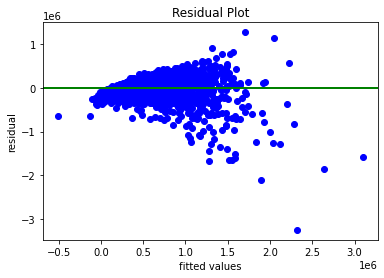

In [98]:
#Plotting the residual plot to help us assess for bias
#This is determined by difference between our predicted values and our observed values

residuals=np.subtract(y_pred,y_test)

plt.scatter(y_pred, residuals, color='blue')
plt.title('Residual Plot') 
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y = (residuals.mean()), color='green', linewidth=2)
plt.show()


We observe our prediction follows the pattern of a good residual plot as it has reveals the following: 
It has a high density of points close to the origin and a low density of points away from the origin
It is symmetric about the origin.

This therefor maens that variance of most data points are the same, though there is a pattern of increased negative variance as distribution increases.
  

3)Lasso regression

In [100]:
# Before building the models, let's first scale data. 
# Lasso put constraints on the size of the coefficients associated to each variable. 
# But, this value depends on the magnitude of each variable and it is therefore 
# necessary to center and reduce, or standardize, the variables.

#
# Importing StandardScaler

from sklearn.preprocessing import StandardScaler

# Creating features and target variables

X= df.drop(['price'], axis=1)
y= df['price']

# Scaling the data 

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [102]:
# We can basically build the Lasso model. 
# But for now, we will train it on the whole dataset and look at an R-squared score and on the model coefficients. 
# Note, that we are not setting the alpha, it is defined as 1.

# Creating lasso object
# 
lasso = linear_model.Lasso() 

# Fitting the models
# 
lasso.fit(X, y) 

# Print scores, MSE, and coefficients
# 
print("lasso score:", lasso.score(X, y)) 
print("lasso MSE:", mean_squared_error(y, lasso.predict(X))) 
print("lasso coef:", lasso.coef_) 

lasso score: 0.6997525536733683
lasso MSE: 40518022116.35509
lasso coef: [-33292.21075087  31697.82535674 259457.31589161   5315.2138083
   3614.96948484  50439.07198689  40563.44510569  17186.55108076
 112827.34401399 -83763.68277541 -58548.42851749 -77025.47282042
   7962.04001793 -31167.26388666  83526.36572597 -30269.33526327
  14850.06168935 -10439.75419149]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27085655586135.5, tolerance: 291664766083.6765
  positive)


We observe that our model has an accuracy score of 69.98%

Based on the coefficients, the features that influence price most are the ones with high coefficient values.

i) L1 regularization to tune the parameters

In [111]:
# Splitting the data into training and test sets, building Lasso, 
# and choosing the regularization parameter with the help of GridSearch. 
# For that, we have to define the set of parameters for GridSearch. 
# In this case, a model with the highest R-squared score will give us the best parameters.
# 

# Making necessary imports, split data into training and test sets, and choose a set of parameters 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fitting models 
gridlasso.fit(X_train, y_train) 


#print the best parameters, R-squared scores, MSE, and coefficients

print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(X_test, y_test)) 
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)

lasso best parameters: {'alpha': 21.0}
lasso score: 0.7097090163878493
lasso MSE: 41211703110.60984
lasso best estimator coef: [-3.69884742e+04  3.62275459e+04  2.84236867e+02  1.41883588e-01
  1.13651350e+04  5.50535029e+05  5.18910691e+04  2.90625912e+04
  9.62675194e+04 -1.03477736e+02 -1.35504662e+02 -2.62472207e+03
  1.75862943e+01 -5.85090613e+02  6.01343447e+05 -2.15440293e+05
  2.44235201e+01 -3.60147101e-01]


We observe that the model accuracy has improved to a score of 70.97%, the best alpha value for tuning the parameters is 21.0. The coeffients have also reduced.

Lasso also helps with feature selection and eliminates features that are not influencing the dependent variable

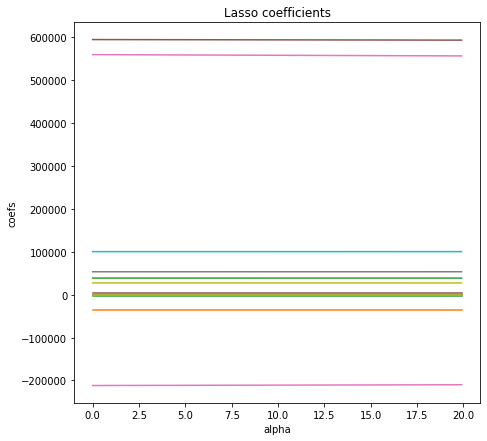

In [175]:
#Visualizing Lasso coefficients

coefsLasso = [] 

# Building Lasso for 200 values of alpha and write the coefficients into array
# 
alphasLasso = np.arange (0, 20, 0.1) 
for i in range(200):
    lasso = linear_model.Lasso(alpha=alphasLasso[i])
    lasso.fit(X_train, y_train)
    coefsLasso.append(lasso.coef_) 

# Building Lasso coefficient plots
# 
plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.show()

We can observe that most features coefficient values have been reduced close to zero with the exception of 3 that have very high coeffients

4)Elastic net regression

In [103]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from math import sqrt

In [110]:
#Creating X and y variables

X= df.drop(['price'], axis=1)
y= df['price'] 

# Splitting the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 200)

# We will train our model

elastic= ElasticNet(normalize=True)
elastic.fit(X_train, y_train)

# Making predictions

y_pred = elastic.predict(X_test)

# To measure the accuracy of the elastic net regression model, we will pring MSE and RMSE

meanSquaredError=(mean_squared_error(y_true=y,y_pred=elastic.predict(X)))
print("MSE:", meanSquaredError)
rootMeanSquaredError = sqrt(meanSquaredError)
print("RMSE:", rootMeanSquaredError) 
print("elastic score:", elastic.score(X_test, y_pred))

MSE: 134870207297.8585
RMSE: 367246.7934480279
elastic score: 1.0


Our elastic net model got an RMSE score of  367,246 and an accuracy score of 100% this is an issue of overfitting. We need to tune the paramenters to overcome this.

i)Cross validating to get the best parameters

In [22]:
from sklearn.model_selection import KFold
# Elastic net, just like ridge and lasso regression, requires normalize data. 
# This argument  is set inside the ElasticNet function. 
# The second thing we need to do is create our grid.

parameters = {'alpha': np.logspace(-5,2,8)}

# We will apply cross validation of 10 folds

kfold = KFold(n_splits = 10)

# We will use  grid search to find the optimal parameters 

elastic=ElasticNet(normalize=True)
grid_search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

# #To fit our regularised model with the best parameters

results = grid_search.fit(X, y)

# Displaying the best parameters and the the best score

print(grid_search.best_params_)
(abs(np.sqrt(grid_search.best_score_)))

rootMeanSquaredError = sqrt(meanSquaredError)
print("RMSE:", rootMeanSquaredError) 

{'alpha': 1e-05, 'l1_ratio': 0.8}
RMSE: 367246.78690316353


We observe that the best hyperparameters was an alpha set to 0.00001 and a l1_ratio of 0.8. 
With these settings our model got best score of RMSE of 367246. 

ii)Elastic net model with best parameters

In [106]:
#With the best hyperparameters tuning an alpha set to 0.00001 and a l1_ratio of 0.8. 
#Let's fit the parameters to assess the performance

elastic=ElasticNet(normalize=True,alpha=0.00001,l1_ratio=0.8)
elastic.fit(X,y)
# second_model=(mean_squared_error(y_true=y,y_pred=elastic.predict(X)))
# print(second_model)

meanSquaredError=(mean_squared_error(y_true=y,y_pred=elastic.predict(X)))
print("MSE:", meanSquaredError)
rootMeanSquaredError = sqrt(meanSquaredError)
print("RMSE:", rootMeanSquaredError) 
print("elastic score:", elastic.score(X, y)) 

MSE: 40618690340.85005
RMSE: 201540.79076169682
elastic score: 0.699006580011474


We observe that the score has reduced to 69.9% which eliminates the overfitting. Our model has drastically improved from RMSE of 367,246 to 201,507

Elastic net can work with as many variables as are available

In [176]:
# Below are the elastic net coefficients

coef_dict_baseline = {}
for coef, feat in zip(elastic.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 0.03238112781116633,
 'bedrooms': 28.89568459989334,
 'condition': 24.059885212882282,
 'floors': 128.63999791659236,
 'grade': 0.031164028992477357,
 'id': 13.828516267132306,
 'lat': 5.956566421187448,
 'long': 0.03605237877670703,
 'sqft_above': 0.03090049246999377,
 'sqft_basement': 0.07020774410325188,
 'sqft_living': 8.981266556651e-05,
 'sqft_living15': 0.00012228458508705656,
 'sqft_lot': 20.293858106685803,
 'view': 2.3857390330761405,
 'waterfront': 22.309220796967786,
 'yr_built': 0.012898789832831258,
 'yr_renovated': -0.04017169606254585,
 'zipcode': 93.70929129435147}

We note that the coefficients have greatly been reduced by this model

5) Quantile regression

In [112]:
import statsmodels.formula.api as smf 

x= df[['bedrooms','condition','grade','bathrooms','sqft_living','sqft_lot','floors','sqft_above','view','sqft_lot15']]
y=df['price']
#quantile reg

import statsmodels.formula.api as smf 

mod = smf.quantreg('y ~ x',df)
res = mod.fit(q=.5)

# Then print out the summary of our model
#
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.3342
Model:                       QuantReg   Bandwidth:                   2.674e+04
Method:                 Least Squares   Sparsity:                    3.866e+05
Date:                Fri, 31 Jul 2020   No. Observations:                21613
Time:                        11:04:51   Df Residuals:                    21602
                                        Df Model:                           10
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.213e+05   1.46e+04    -22.016      0.000    -3.5e+05   -2.93e+05
x[0]       -3.781e+04   1808.234    -20.907      0.000   -4.13e+04   -3.43e+04
x[1]        2.145e+04   2121.879     10.110      0.000    1.73e+04    2.56e+04
x[2]        7.468e+04   1900.277     39.302      0.0

We observe that our R2 score is 33% this is very poor performance.The intercept is 3.866e+05 and our slope or the coefficient for our x is -3.781e+04. 
These are the parameters for the 0.5th quantile of our y.

The model performs best when the data is continous.
It is quite beneficial when heteroscedasticity is present in the data.

It is robust to outliers.

It is more useful than linear regression when the data is skewed

In [167]:
#To implement for other quantiles
X= df.drop(['price'], axis=1)
y= df['price']

df['price'] = df['price'].apply(np.int64)

In [168]:
df.dtypes

id               int64
price            int64
bedrooms         int64
bathrooms        int64
sqft_living      int64
sqft_lot         int64
floors           int64
waterfront       int64
view             int64
condition        int64
grade            int64
sqft_above       int64
sqft_basement    int64
yr_built         int64
yr_renovated     int64
zipcode          int64
lat              int64
long             int64
sqft_living15    int64
sqft_lot15       int64
dtype: object

In [170]:
## Models for other quantiles

quantiles = np.arange(0.1,1,0.1) 
models = []
params = []

# We build models for each quantile in our list quantiles inside a for loop
# As we build these models we also store the model parameters in a list called params. 
for qt in quantiles: 
	res = mod.fit(q = qt )  
	models.append(res)
	params.append([qt, res.params['Intercept'], res.params['x']] + res.conf_int().loc['x'].tolist())

# Lastly we make a dataframe of the same name, so we we can view our different models.
params = pd.DataFrame(data = params, columns = ['qt', 'intercept', 'x_coef', 'cf_lower_bound', 'cf_upper_bound'])
print(params)

KeyError: ignored

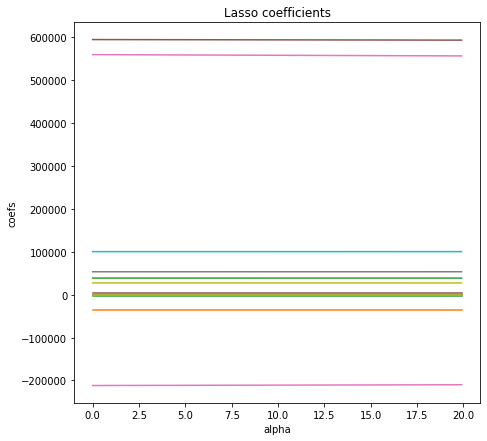

In [173]:
#Importing library for visualization

coefsLasso = [] 

# Building Lasso for 200 values of alpha and write the coefficients into array
# 
alphasLasso = np.arange (0, 20, 0.1) 
for i in range(200):
    lasso = linear_model.Lasso(alpha=alphasLasso[i])
    lasso.fit(X_train, y_train) 
    coefsLasso.append(lasso.coef_) 

# Visualizing Lasso coefficient plots
# 
plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.show()

#Conclusion

It is evident that our mutiple regression model performed best even without normalizing or standardizing the data. while ridge,lasso and elastic regression perfomed better after tuning the parameters through regularization. It is clear that multicollienarity of the dependent variables did not affect the performace of the models. 
For quantile regression, this must have affected performance of the model, the existence of too many repeated values could also have contributed to poor performance.

#Challenging the solution
The performance could be improved by testing other models e.g KNN,Decision tree,SVM among others
The dataset should have hadd detailed description about the different variables e.g the currency of the prices, the description of differnt grades,condition. This eases the analysis and eliminates chances of making wrong assumption.
